# <center>ASTR4004/8004 - Neural Networks - Part 2</center>

This notebook builds a neural network <font color='red'>using exisiting framework such as `pytorch` or `tensorflow`</font>.

We will use dense layers to recognize handwritten digits from the Modified National Institute of Standards and Technology database (i.e., [MNIST dataset](http://yann.lecun.com/exdb/mnist/)), and construct the following architecture for our network (but feel free to explore others!)

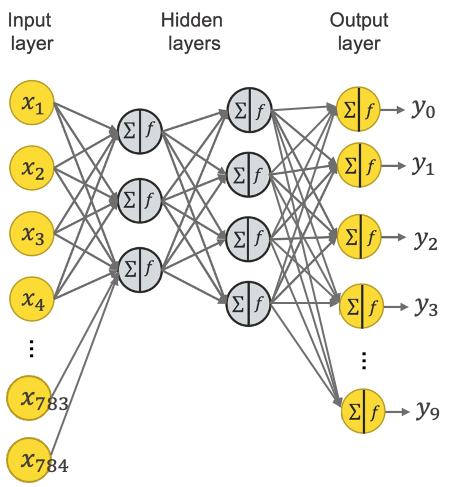



As shown above, the input layer has 784 neurons to fit in all pixels within each 2D image from MNIST, which has a 28x28 pixels.

The output layer has 10 neurons, corresponding to the label being 0, 1, 2, ..., 9. 

The goal is to have only one of the neurons being 1 and this neuron corresponds to the label of the image (i.e., the number of the handwirrent digit). All remain neurons should be 0.

In the middle, let's do only one hidden layer with 64 nodes. 

All neurons are fully connected.

We implement ReLU, sigmoid and softmax activation functions. SGD and Momentum optimizer are available.

Note, we use the softmax activation function in the output layer, since we wish to have probabilities of each class, so that we can measure how well our current forward pass performs.

## Useful packages

In [1]:
# Let's work within our working directory, e.g., where MNIST data is stored
import os
os.chdir('/home/563/yq5547/notebooks/ASTR4004')

# We need numpy to handle data and array
import numpy as np

# We need matplotlib.pyplot to make plots
import matplotlib.pyplot as plt

# tensorflow and its keras API provides a NN framework
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, Model

# set hyperparameters at the beginning
l_rate = 0.1
Nepoch = 20
batch_size = 64

2024-10-10 15:42:50.375792: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-10 15:42:50.386926: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 15:42:50.439898: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-10 15:42:50.450452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 15:42:56.201044: W tensorflow/compiler/tf2t

## Dataset preparation
MNIST contains 70,000 images of handwritten digits, in greyscale with pixel-values from 0 to 255. Let us first load the data. I have store them in two seperated numpy files.

In [2]:
# load data
images = np.load('./MNIST_images.npy', allow_pickle=True)
labels = np.load('./MNIST_labels.npy', allow_pickle=True)

# it is normally a good practice to rescale the training data into [0, 1] or [-1, 1]
images = (images - np.min(images)) / (np.max(images) - np.min(images))

# flatten images into 1D array
x = images.reshape([len(labels), -1])
# create a one-hot encoding of the labels of size 10, i.e., #
# when label is 1, the array is [1, 0, 0, ..., 0]
# when label is 2, the array is [0, 1, 0, ..., 0]
# ...
# when label is 9, the array is [0, 0, 0, ..., 9]
y = np.array(labels.astype('int32')[:, None] == np.arange(10), dtype=np.float32)

### Let's divide the sample into training (90%) and test (10%) 

In [3]:
train_size = int(0.9 * len(x)) # tensorflow can split some from training set for validation
test_size = len(x) - train_size

x_train, x_test = x[:train_size], x[test_size:]
y_train, y_test = y[:train_size], y[test_size:]
images_test, labels_test = images[test_size:], labels[test_size:]

print("Training data: {} {}".format(x_train.shape, y_train.shape))
print("Test data: {} {}".format(x_test.shape, y_test.shape))

Training data: (63000, 784) (63000, 10)
Test data: (63000, 784) (63000, 10)


### It is often a good practice to reshuffle the training set to get rid of any existing pattern in the data

In [4]:
shuffle_index = np.random.permutation(train_size)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]
shuffle_index = np.random.permutation(test_size)
x_test, y_test = x_test[shuffle_index], y_test[shuffle_index]
images_test, labels_test = images_test[shuffle_index], labels_test[shuffle_index]

## Network definition

In [5]:
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),                 # Input layer
    layers.Dense(128, activation='sigmoid'),        # First hidden layer
    layers.Dense(10, activation='softmax')          # Output layer
])

2024-10-10 15:43:15.085568: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### let's visualize how the initial network behaves

1/1 [==============================] - 1s 684ms/step


Text(0, 0.5, 'Probability')

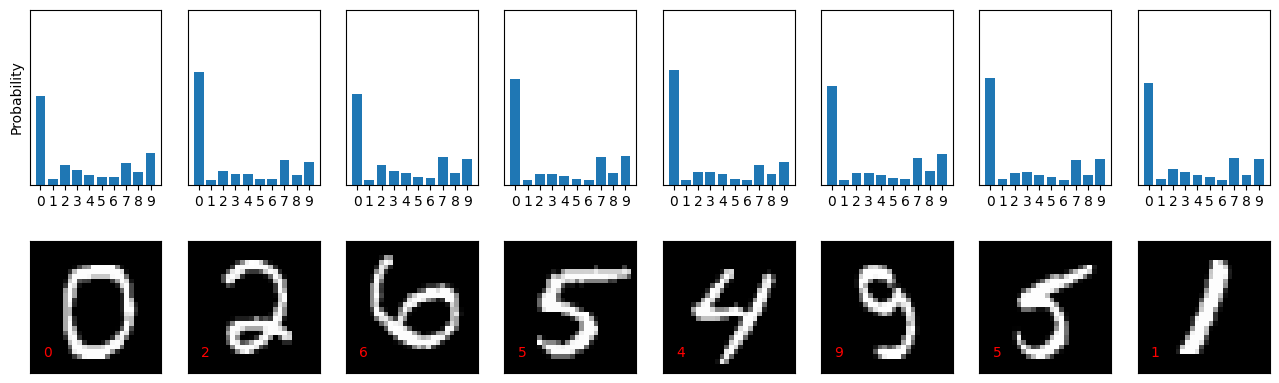

In [7]:
num_col = 8
fig, axes = plt.subplots(2, num_col, figsize=(num_col*2,5))
output = model.predict(x_test[:num_col])

for i in range(num_col):
    ax = axes[1,i]
    ax.imshow(images_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.1,0.1, labels_test[i], va='bottom', ha='left', transform=ax.transAxes, color='r')
    axp = axes[0,i]
    axp.bar(np.arange(10), output[i])
    axp.set_xticks(np.arange(10))
    axp.set_yticks([])
    axp.set_ylim(0,0.8)
axes[0,0].set_ylabel('Probability')

<font color='red'>Also pretty bad!!!</font>


## Network training

In [8]:
# register the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=l_rate),    # Optimizer
    loss='categorical_crossentropy',         # Loss function
)

In [9]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=Nepoch,
    batch_size=batch_size,
    validation_split=0.2, 
)

Epoch 1/20
788/788 [==============================] - 2s 2ms/step - loss: 0.5702 - val_loss: 0.5113
Epoch 2/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4565 - val_loss: 0.5641
Epoch 3/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4325 - val_loss: 0.3801
Epoch 4/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4027 - val_loss: 0.3665
Epoch 5/20
788/788 [==============================] - 1s 1ms/step - loss: 0.3932 - val_loss: 0.4074
Epoch 6/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4264 - val_loss: 0.6148
Epoch 7/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4203 - val_loss: 0.3993
Epoch 8/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4007 - val_loss: 0.3636
Epoch 9/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4023 - val_loss: 0.5227
Epoch 10/20
788/788 [==============================] - 1s 1ms/step - loss: 0.4121 - val_loss: 0.3719

### Let's view the loss

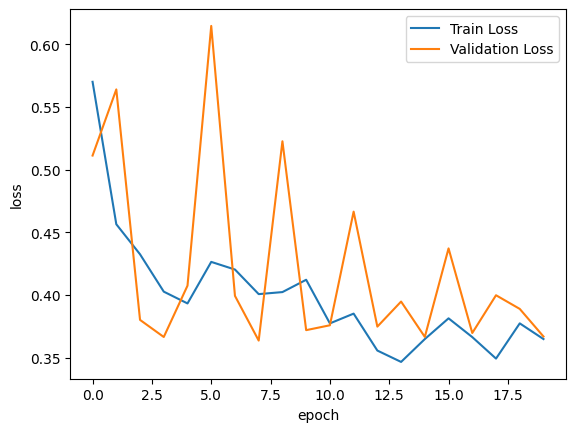

In [10]:
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(loc='upper right')

### how does the model prediction look now?

1/1 [==============================] - 0s 24ms/step


Text(0, 0.5, 'Probability')

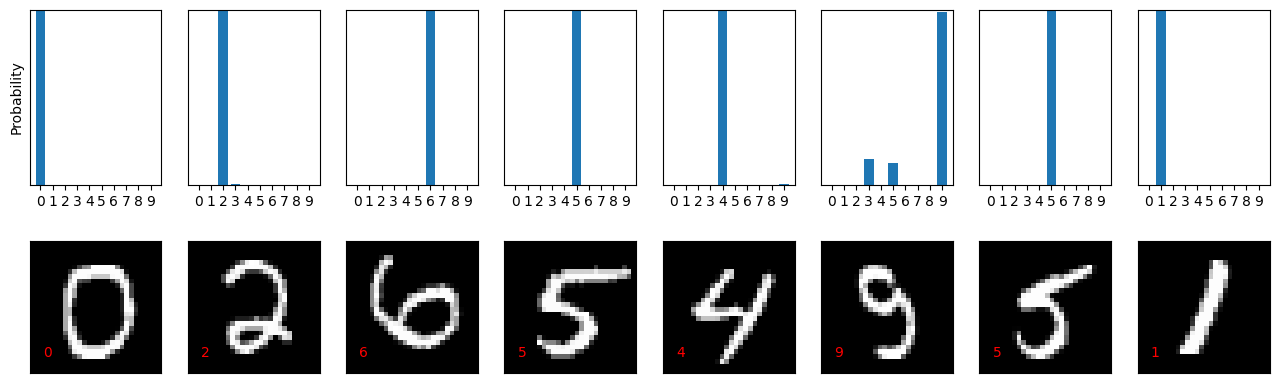

In [11]:
num_col = 8
fig, axes = plt.subplots(2, num_col, figsize=(num_col*2,5))
output = model.predict(x_test[:num_col])

for i in range(num_col):
    ax = axes[1,i]
    ax.imshow(images_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.1,0.1, labels_test[i], va='bottom', ha='left', transform=ax.transAxes, color='r')
    axp = axes[0,i]
    axp.bar(np.arange(10), output[i])
    axp.set_xticks(np.arange(10))
    axp.set_yticks([])
    axp.set_ylim(0,0.8)
axes[0,0].set_ylabel('Probability')

<font color='red'>Pretty good, huh?</font> go back and try different learning rates, activation functions or even the architectures

## We can save the model onto disc and use it later 

In [ ]:
# saving the entire model
model.save('model.h5') 
# loading
loaded_model = tf.keras.models.load_model('model.h5')

# saving only the architecture ( nno weights or optimizer state)
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)
# loading
with open('model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# saving only the weights
model.save_weights('model_weights.h5')
# load the weights
model.load_weights('model_weights.h5')

## Let's talk about a couple of tricks

### Dropout
Dropout is a regularization technique that involves randomly "dropping out" (i.e., setting to zero) a fraction of the neurons in a neural network during each training iteration. By doing so, dropout prevents neurons from co-adapting too much to the training data, thereby reducing overfitting and enhancing the network's ability to generalize.



In [12]:
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),              # Input layer
    layers.Dense(512, activation='relu'),        # First hidden layer
    layers.Dropout(0.2),                         # Dropout for regularization
    layers.Dense(256, activation='relu'),        # Second hidden layer
    layers.Dropout(0.2),                         # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer
])

### EarlyStopping
Early Stopping is a form of regularization used to avoid overfitting when training machine learning models. It involves monitoring the model's performance on a separate validation dataset during the training process and stopping the training once the performance on the validation set ceases to improve for a specified number of consecutive epochs.


In [13]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', # Quantity to be monitored.
    patience=5, # Number of epochs with no improvement after which trainning is stopped.
)

### ModelCheckpoint
ModelCheckpoint is a callback function in TensorFlow Keras that allows you to save the state of your model at various stages during training. It can save the entire model (architecture, weights, and optimizer state) or just the model's weights. 

In [14]:
checkpoint = callbacks.ModelCheckpoint(
    'best_mnist_dense_model.h5', # path to save the model file
    monitor='val_loss',  # Quantity to be monitored.
    save_best_only=True, # If True, only saves when the monitored metric improves.
    save_weights_only = False, # If True, only the model's weights are saved; otherwise, the entire model is saved.
)

### ReduceLROnPlateau
ReduceLROnPlateau is a callback function that monitors a specified metric during training and reduces the learning rate by a predefined factor when the metric has ceased to improve for a set number of epochs (patience). This adaptive adjustment helps the model converge more smoothly and avoid getting stuck in local minima, enhancing overall training efficiency and performance.

In [15]:
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', # Quantity to be monitored.
    factor=0.2, # Factor by which the learning rate will be reduced.
    patience=10, # Number of epochs with no improvement after which learning rate will be reduced.	
    min_lr=1e-6 # Lower bound on the learning rate.
)

In [16]:
model.compile(
    optimizer='adam',    # Optimizer
    loss='categorical_crossentropy',         # Loss function
)
history = model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=False, use_multiprocessing = True, workers=12
)

/home/563/yq5547/virtualenvs/py21cmfast/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### how does the model prediction look now?

(0.0, 1.0)

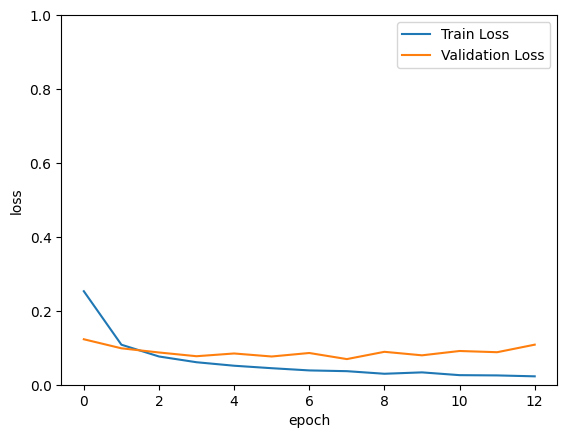

In [17]:
fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(loc='upper right')
ax.set_ylim(0,1)

## Finally, parallization is so easy in tensorflow including using GPU!

Training/fitting can also use multiple processes to speed up easily with the `use_multiprocessing` and `workers` arguments

In [11]:
model.fit( x_train, y_train, epochs=2, batch_size=batch_size,
           validation_data=(x_valid, y_valid),
           use_multiprocessing = True, workers=2)

Epoch 1/2
766/766 [==============================] - 1s 1ms/step - loss: 3.0067 - val_loss: 2.6694
Epoch 2/2
766/766 [==============================] - 1s 1ms/step - loss: 2.8133 - val_loss: 2.3470


If you want to use GPU for `model.fit`, build and compile the model under `tf.device`

<font color='red'>To support GPU in tensorflow, make sure you have install `tensorflow-gpu`</font>


In [ ]:
with tf.device('/GPU:0'):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit( x_train, y_train, epochs=2, batch_size=batch_size,
            validation_data=(x_valid, y_valid))

If the data is too big, you might want to split it across multiple devices. You can do so simply by compiling the model inside a `Strategy`

In [ ]:
# Define a MirroredStrategy
strategy = tf.distribute.MirroredStrategy()

# Open a strategy scope
with strategy.scope():
    # Build your model inside the scope
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(784,)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit( x_train, y_train, epochs=2, batch_size=batch_size,
            validation_data=(x_valid, y_valid))

If the model is too big, it can be placed on different devices easily with `tf.device`

In [ ]:
# Split the model across two GPUs
input_layer = layers.Input(shape=(784,))

with tf.device('/gpu:0'):
    hidden_layer = layers.Dense(64, activation='relu')(input_layer)

with tf.device('/gpu:1'):
    output_layer = layers.Dense(10, activation='softmax')(hidden_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit( x_train, y_train, epochs=2, batch_size=batch_size,
            validation_data=(x_valid, y_valid))